### Problem 2 —— 黄家乐

<font size = 4 color = black face = "Times New Roman">To solve this problem, firstly, we should derive some equations.


From the Newton's secnd law, we have:
$$
\begin{align}
\frac{d^2x}{dt^2} = & -\frac{F_{G,x}}{M_E} = -\frac{GM_S x}{r^3}(1 + \frac{\alpha}{r^2})\\
\frac{d^2y}{dt^2} = & -\frac{F_{G,y}}{M_E} = -\frac{GM_S y}{r^3}(1 + \frac{\alpha}{r^2})\\
\end{align}
$$
Hence we can write each of the second-order differential equations as two first-order differential equations:
$$
\begin{align}
\frac{dx}{dt} = &  v_x\\
\frac{dy}{dt} = &  v_y\\
\frac{dv_x}{dt} = & -\frac{GM_S x}{r^3}(1 + \frac{\alpha}{r^2})\\
\frac{dv_y}{dt} = & -\frac{GM_S y}{r^3}(1 + \frac{\alpha}{r^2})\\
\end{align}
$$
Then we can using Euler-Cromer method to solve the equations:
$$
\begin{align}
r_i^2 = & (x_i^2+y_i^2)\\
x_{i+1} = & x_i + v_{x,i}\Delta t \\
y_{i+1} = & y_i + v_{y,i}\Delta t \\
v_{x,i+1} = & v_{x,i} - \frac{GM_S x_i}{r_i^3}(1 + \frac{\alpha}{r^2})\Delta t \\
v_{y,i+1} = & v_{y,i} - \frac{GM_S y_i}{r_i^3}(1 + \frac{\alpha}{r^2})\Delta t 
\end{align}
$$
What is more we have known that chhoosing yr and AU as the time and length units. It can be shown that:
$$
GM_S = 4\pi^2AU^3/yr^2
$$
And uing the conservation of both energy and angular momentum over the course of an orbit. We can get:
$$
v_{min} = \sqrt{\frac{GM_S(1-e)}{a(1+e)}}
$$
For this problem $a = 0.39, e = 0.206, r_1  =  (1+e)a = 0.47$

In [1]:
import numpy as np
from math import pi,atan
import matplotlib.pyplot as plt

In [2]:
# Define a class to solve this problem
class Mecury():

    # Define the initial value
    def __init__(self,a=0.39, r = 0.47, e = 0.206, alpha = 0.01):
        self.vx_list = [0]
        self.vy_list = [8.2]
        self.x_list = [r]
        self.y_list = [0]
        self.t_list = [0]
        self.r_list = [r]
        self.alpha = alpha

        # Define the farthest points' data

        self.x_m = []
        self.y_m = []
        self.t_m = []
    
    # Define the Euler-Cromer iterate.
    def EC_iterater(self,dt):
        self.r = (self.x**2+self.y**2)**0.5
        self.vx = self.vx - 4*pi**2*self.x/self.r**3*(1+self.alpha/self.r**2)*dt
        self.vy = self.vy - 4*pi**2*self.y/self.r**3*(1+self.alpha/self.r**2)*dt
        self.x = self.x + self.vx*dt
        self.y = self.y + self.vy*dt
        self.t = self.t + dt

    # Define the Euler-Cromer method's main code.
    def EC_calculate(self,dt = 0.00001,N = 10000):
        self.vx =  self.vx_list[0]
        self.vy = self.vy_list[0]
        self.x = self.x_list[0]
        self.y = self.y_list[0]
        self.t = 0
        self.t1 = 0
        while self.t < 10:
            self.EC_iterater(dt)
            self.x_list.append(self.x)
            self.y_list.append(self.y)
            self.t_list.append(self.t)
            self.r_list.append(self.r)
            # The try_except is used to find the fastest points.
            try:
                if (self.r_list[-2] 
                > self.r_list[-1]) and (self.r_list[-2] > self.r_list[-3]):
                    self.x_m.append(self.x_list[-2])
                    self.y_m.append(self.y_list[-2])
                    self.t_m.append(self.t_list[-2])
            # At first we don't have enough Index so this error will happen, to confirm the code to run right, we should append this part.
            except IndexError:
                continue
        
    # Define a function to calculate precession's angles.
    def angles(self):
        self.theta_list = []
        self.theta = 0
        self.theta_1 = 0
        for x, y in zip(self.x_m,self.y_m):
            if x >= 0 and y >= 0:
               self.theta_1 = atan(y / x) * 180 / pi 
                
            elif x > 0 and y < 0:
                self.thta_1 = (2 * pi + atan(y / x)) * 180 / pi 
                
            else:
                self.theta_1 = (pi + atan(y / x)) * 180 / pi 
            
            self.theta += self.theta_1 
            self.theta_list.append(self.theta)

    # Define the plot function.
    def plotMecury(self,show = True):
        self.EC_calculate()
        self.angles()
        rate, y0 = np.polyfit(self.t_m , self.theta_list, 1)# Do the least square fit to get the rate.
        if show :
            fig = plt.figure(figsize = (10,10))
            ax1 = fig.add_subplot(211)
            ax2 = fig.add_subplot(212)
            ax1.plot(self.x_list,self.y_list)
            ax1.set_title('Simulation of the Precession of Mercury')
            ax1.set_xlabel('x/AU')
            ax1.set_ylabel('y/AU')
            # Draw the lines from the origin to the points on each orbit that are farthest from the sun.
            for x, y in zip(self.x_m, self.y_m):
                ax1.plot([0, x], [0, y])

            ax2.plot(self.t_m, self.theta_list, 'o', label = 'points')
            t = np.arange(0, 10 , 0.0001)
            ax2.plot(t, rate * t + y0 , label = 'linear_fit')
            ax2.set_title(rf"$\alpha={self.alpha}$, linear fit")
            ax2.set_xlabel("t/yr")
            ax2.set_ylabel(r"$(\theta)$degrees")
            ax2.legend()

            print("Precession rate:%.1f degrees/yr" %rate)
        else:
            return rate

Precession rate:713.6 degrees/yr


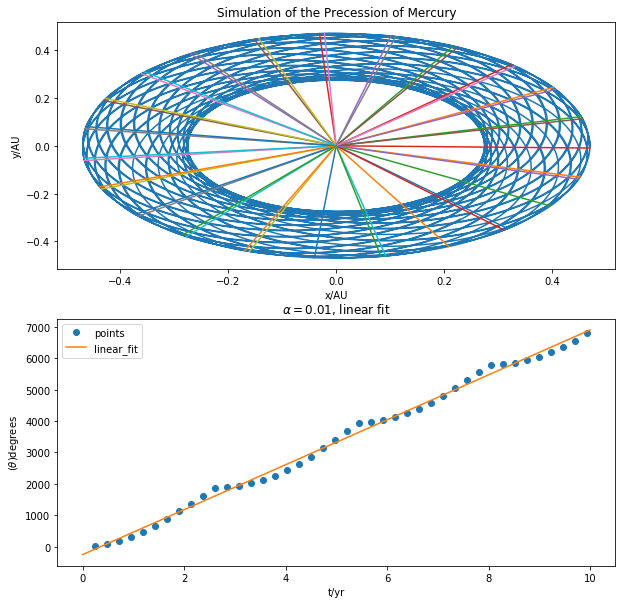

In [3]:
a = Mecury(alpha = 0.01)
a.plotMecury()

Hence when $\alpha = 0.01$ ,the Precession rate is 713.6 degrees/yr

<font size = 4 color = black face = "Times New Roman">Repeat the calculation with different values of and obtain the best-fit precession rate in each case. We then plot the precession rate as a function of . We can find that the precession rate varies linearly with and we can determine the coefficient of proportionality by using the least -square fit. The precession rate of Mercury can be extrapolated
with $\alpha = 1.1 \times 10^{-8} AU^2$

In [4]:
Alpha = np.arange(0,0.000001,0.0000001)
Rate = np.zeros_like(Alpha)

In [5]:
for i in range(len(Alpha)):
    Rate[i] = Mecury(alpha = Alpha[i]).plotMecury(show = False)

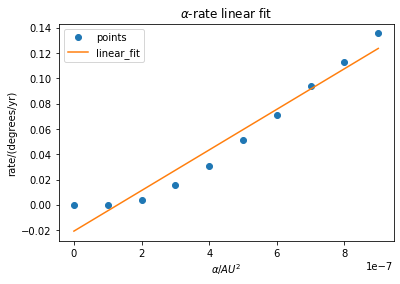

In [6]:
rate_r, y_r = np.polyfit(Alpha , Rate, 1)
plt.plot(Alpha, Rate, 'o', label = 'points')
plt.plot(Alpha, y_r + rate_r * Alpha, label = 'linear_fit')
plt.title(r'$\alpha$-rate linear fit')
plt.xlabel(r'$\alpha/AU^2$')
plt.ylabel('rate/(degrees/yr)')
plt.legend()
plt.show()

We know from this graph that when $\alpha$ is very small, the fitted line will be negative, but our knowledge of reality and our calculations tell us that the rate of precession cannot be negative. So taht, when $\alpha = 1.1 \times 10^{-8}$ , to calculate its rate, we will use this equation :$rate = C\alpha $, where $C$ is the coefficient from the least square method

In [7]:
alpha = 1.1 * 10 ** (-8)
rate_mecury_arcsecond = ( rate_r * alpha) * 3600 * 100
real_date = 556
relative_error = abs(real_date - rate_mecury_arcsecond) / real_date * 100

In [8]:
print(f'The precession of the perihelion of Mercury that we calculate is {rate_mecury_arcsecond:.0f} arcsecond.\nWith relative error is {relative_error:.1f}%')

Tthe precession of the perihelion of Mercury that we calculate is 635 arcsecond.
With relative error is 14.2%
